<a href="https://colab.research.google.com/github/Kadakol/Keras/blob/master/3_4_Classifying_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 2s 0us/step


In [2]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [3]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict((value, key) for (key, value) in word_index.items())
decoded_review = ' '.join(reverse_word_index.get(i - 3, '?') for i in train_data[0])

decoded_review

1646592/1641221 [==============================] - 1s 1us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
# encoding the integer sequences into a binary matrix

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models, layers

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
 model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
from keras import optimizers, losses, metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=[x_val, y_val])

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.5486 - acc: 0.7791 - val_loss: 0.4266 - val_acc: 0.8635
Epoch 2/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.3413 - acc: 0.8982 - val_loss: 0.3229 - val_acc: 0.8846
Epoch 3/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.2450 - acc: 0.9219 - val_loss: 0.2947 - val_acc: 0.8857
Epoch 4/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.1926 - acc: 0.9355 - val_loss: 0.2731 - val_acc: 0.8909
Epoch 5/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.1538 - acc: 0.9505 - val_loss: 0.2751 - val_acc: 0.8904
Epoch 6/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.1279 - acc: 0.9600 - val_loss: 0.3012 - val_acc: 0.8837
Epoch 7/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1042 - acc: 0.9701 - val_loss: 0.3001 - val_ac

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

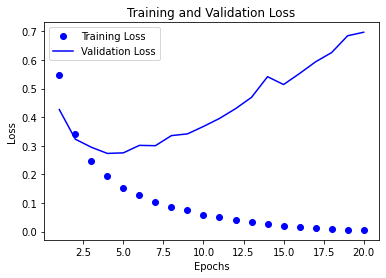

In [16]:
import matplotlib.pyplot as plt

loss_values = history_dict ['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

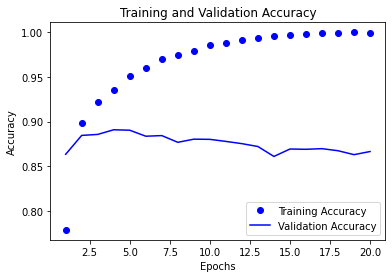

In [20]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [21]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=4,
          batch_size=512)

results = model.evaluate(x_test, y_test)

print(results)

Epoch 1/4
15000/15000 [==============================] - 1s 73us/step - loss: 0.5266 - accuracy: 0.7798
Epoch 2/4
15000/15000 [==============================] - 1s 67us/step - loss: 0.3108 - accuracy: 0.9031
Epoch 3/4
15000/15000 [==============================] - 1s 68us/step - loss: 0.2250 - accuracy: 0.9249
Epoch 4/4
25000/25000 [==============================] - 2s 65us/step
[0.29176793919563293, 0.88264000415802]


In [22]:
model.predict(x_test)

array([[0.22820055],
       [0.9995314 ],
       [0.9401765 ],
       ...,
       [0.09641659],
       [0.13985258],
       [0.7076662 ]], dtype=float32)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.4891 - acc: 0.8129 - val_loss: 0.4131 - val_acc: 0.8383
Epoch 2/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.3165 - acc: 0.9039 - val_loss: 0.3198 - val_acc: 0.8859
Epoch 3/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.2467 - acc: 0.9237 - val_loss: 0.2972 - val_acc: 0.8872
Epoch 4/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.2034 - acc: 0.9387 - val_loss: 0.2796 - val_acc: 0.8907
Epoch 5/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1729 - acc: 0.9476 - val_loss: 0.2787 - val_acc: 0.8893
Epoch 6/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.1485 - acc: 0.9565 - val_loss: 0.2754 - val_acc: 0.8892
Epoch 7/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1301 - acc: 0.9618 - val_loss: 0.2944 - val_ac

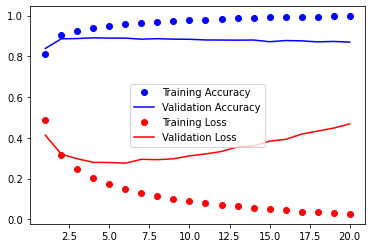

In [27]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=[x_val, y_val])

history_dict = history.history
print(history_dict.keys())

plt.clf()

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, history_dict['acc'], 'bo', label='Training Accuracy')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation Accuracy')
plt.plot(epochs, history_dict['loss'], 'ro', label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], 'r', label='Validation Loss')

plt.legend()
plt.show()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.5257 - acc: 0.7686 - val_loss: 0.3768 - val_acc: 0.8747
Epoch 2/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.3005 - acc: 0.8993 - val_loss: 0.3228 - val_acc: 0.8746
Epoch 3/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.2166 - acc: 0.9277 - val_loss: 0.2760 - val_acc: 0.8891
Epoch 4/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1649 - acc: 0.9452 - val_loss: 0.2830 - val_acc: 0.8860
Epoch 5/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.1340 - acc: 0.9565 - val_loss: 0.3035 - val_acc: 0.8825
Epoch 6/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1042 - acc: 0.9678 - val_loss: 0.3573 - val_acc: 0.8729
Epoch 7/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.0836 - acc: 0.9736 - val_loss: 0.3348 - val_ac

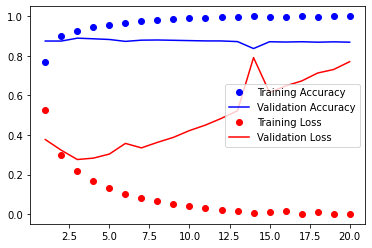

In [28]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=[x_val, y_val])

history_dict = history.history
print(history_dict.keys())

plt.clf()

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, history_dict['acc'], 'bo', label='Training Accuracy')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation Accuracy')
plt.plot(epochs, history_dict['loss'], 'ro', label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], 'r', label='Validation Loss')

plt.legend()
plt.show()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.5199 - acc: 0.7882 - val_loss: 0.3969 - val_acc: 0.8608
Epoch 2/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.3016 - acc: 0.9024 - val_loss: 0.3125 - val_acc: 0.8794
Epoch 3/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.2135 - acc: 0.9293 - val_loss: 0.2937 - val_acc: 0.8838
Epoch 4/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.1670 - acc: 0.9445 - val_loss: 0.2775 - val_acc: 0.8886
Epoch 5/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.1315 - acc: 0.9579 - val_loss: 0.2923 - val_acc: 0.8871
Epoch 6/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.1076 - acc: 0.9637 - val_loss: 0.3122 - val_acc: 0.8848
Epoch 7/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.0853 - acc: 0.9734 - val_loss: 0.3335 - 

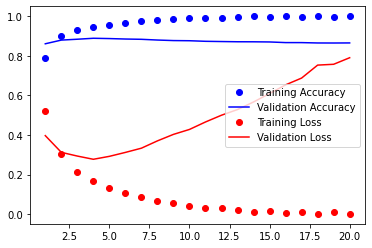

In [29]:
model = models.Sequential()

model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=[x_val, y_val])

history_dict = history.history
print(history_dict.keys())

plt.clf()

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, history_dict['acc'], 'bo', label='Training Accuracy')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation Accuracy')
plt.plot(epochs, history_dict['loss'], 'ro', label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], 'r', label='Validation Loss')

plt.legend()
plt.show()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.4960 - acc: 0.7583 - val_loss: 0.3692 - val_acc: 0.8545
Epoch 2/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.2599 - acc: 0.9036 - val_loss: 0.2990 - val_acc: 0.8810
Epoch 3/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.1921 - acc: 0.9306 - val_loss: 0.2812 - val_acc: 0.8869
Epoch 4/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.1430 - acc: 0.9485 - val_loss: 0.2934 - val_acc: 0.8862
Epoch 5/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.1072 - acc: 0.9623 - val_loss: 0.3144 - val_acc: 0.8855
Epoch 6/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.0820 - acc: 0.9727 - val_loss: 0.4334 - val_acc: 0.8583
Epoch 7/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.0626 - acc: 0.9811 - val_loss: 0.3731 - 

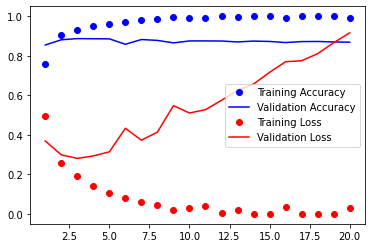

In [30]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=[x_val, y_val])

history_dict = history.history
print(history_dict.keys())

plt.clf()

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, history_dict['acc'], 'bo', label='Training Accuracy')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation Accuracy')
plt.plot(epochs, history_dict['loss'], 'ro', label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], 'r', label='Validation Loss')

plt.legend()
plt.show()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1801 - acc: 0.7586 - val_loss: 0.1215 - val_acc: 0.8678
Epoch 2/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.0924 - acc: 0.9033 - val_loss: 0.1096 - val_acc: 0.8537
Epoch 3/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.0663 - acc: 0.9292 - val_loss: 0.0854 - val_acc: 0.8905
Epoch 4/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.0515 - acc: 0.9465 - val_loss: 0.0866 - val_acc: 0.8853
Epoch 5/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.0404 - acc: 0.9573 - val_loss: 0.0892 - val_acc: 0.8771
Epoch 6/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.0327 - acc: 0.9663 - val_loss: 0.0936 - val_acc: 0.8723
Epoch 7/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.0263 - acc: 0.9755 - val_loss: 0.0883 - val_ac

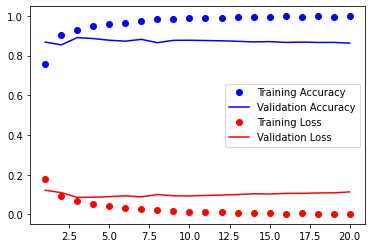

In [31]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=[x_val, y_val])

history_dict = history.history
print(history_dict.keys())

plt.clf()

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, history_dict['acc'], 'bo', label='Training Accuracy')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation Accuracy')
plt.plot(epochs, history_dict['loss'], 'ro', label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], 'r', label='Validation Loss')

plt.legend()
plt.show()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.4960 - acc: 0.7943 - val_loss: 0.3606 - val_acc: 0.8759
Epoch 2/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.2801 - acc: 0.9070 - val_loss: 0.2826 - val_acc: 0.8912
Epoch 3/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.1960 - acc: 0.9366 - val_loss: 0.2718 - val_acc: 0.8895
Epoch 4/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.1468 - acc: 0.9507 - val_loss: 0.2762 - val_acc: 0.8904
Epoch 5/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.1129 - acc: 0.9631 - val_loss: 0.3138 - val_acc: 0.8810
Epoch 6/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.0903 - acc: 0.9697 - val_loss: 0.3354 - val_acc: 0.8836
Epoch 7/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.0688 - acc: 0.9785 - val_loss: 0.3782 - va

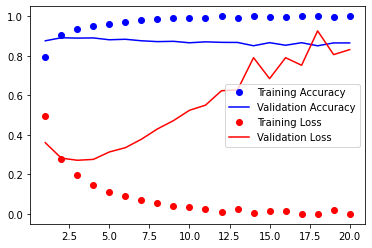

In [32]:
model = models.Sequential()

model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=[x_val, y_val])

history_dict = history.history
print(history_dict.keys())

plt.clf()

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, history_dict['acc'], 'bo', label='Training Accuracy')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation Accuracy')
plt.plot(epochs, history_dict['loss'], 'ro', label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], 'r', label='Validation Loss')

plt.legend()
plt.show()